In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 7.0)

import math
import numpy as np

import os
import pandas as pd
from collections import defaultdict
from Bio import SeqIO
from nltk import bigrams
from nltk import trigrams
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


from keras.layers import Dropout
from keras.layers import Input, Dense, Lambda, LSTM, RepeatVector, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
from keras import regularizers
from keras.layers import GaussianNoise
from keras.layers import Activation
from keras.callbacks import LearningRateScheduler, EarlyStopping

from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
#from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D, GRU
from keras.models import Model
from keras.layers.wrappers import Bidirectional
from keras.models import load_model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

import dask.dataframe as dd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy import interp
from itertools import cycle

Using TensorFlow backend.
/home/nafizh/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# For reproducibility from Keras website

import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
seed = 42
np.random.seed(seed)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Rest of code follows ...

In [76]:
os.chdir('/home/nafizh/ML_works')
new_model = gensim.models.Word2Vec.load('my_wordvec_model_trembl_size_200')
#new_model = gensim.models.Word2Vec.load('my_wordvec_model_trembl')

2017-12-13 15:43:33,722 : INFO : loading Word2Vec object from my_wordvec_model_trembl_size_200
2017-12-13 15:43:33,779 : INFO : loading wv recursively from my_wordvec_model_trembl_size_200.wv.* with mmap=None
2017-12-13 15:43:33,781 : INFO : setting ignored attribute syn0norm to None
2017-12-13 15:43:33,782 : INFO : setting ignored attribute cum_table to None
2017-12-13 15:43:33,783 : INFO : loaded my_wordvec_model_trembl_size_200


In [77]:
print (len(new_model.wv.vocab))
print(new_model['MKL'])

10334
[ -2.32776240e-01  -1.55268192e-01  -4.00416143e-02   2.41138767e-02
   3.14481109e-01  -3.40889879e-02  -1.74724665e-02   1.55761003e-01
   1.39195174e-01  -2.13945098e-02  -1.29820764e-01  -2.65499204e-02
  -1.93720371e-01  -2.30462939e-01  -1.44067451e-01   1.63662344e-01
   1.99719712e-01  -1.98262751e-01   1.06661413e-02   4.92355004e-02
   2.13068157e-01   1.01805096e-02   1.62030295e-01  -5.59065528e-02
   8.64474475e-02  -1.62887022e-01  -6.36618137e-02  -1.22561172e-01
   2.43002668e-01   4.79625314e-02  -6.52903272e-03   1.22699104e-01
  -1.53036192e-02  -1.49868533e-01  -3.53830792e-02  -1.83440253e-01
  -5.16273417e-02   6.12012930e-02   3.36337000e-01  -2.56331805e-02
  -2.84712344e-01   7.01418594e-02  -4.89423312e-02   1.51952356e-01
  -1.27460778e-01  -1.68912318e-02   3.28821003e-01   1.65459275e-01
   4.75502834e-02  -1.38101444e-01  -1.08585708e-01  -3.27962786e-01
   1.21306896e-01  -7.43232891e-02  -1.15719158e-02   5.31668440e-02
  -1.18874840e-01  -9.193691

In [78]:
# defining the essential constant values
#MAX_SEQUENCE_LENGTH = 1602
MAX_SEQUENCE_LENGTH = 302
MAX_NB_WORDS = 10334
EMBEDDING_DIM = 200

In [79]:
# second, prepare text samples and their labels
print('Processing text dataset')

texts = []
for index, record in enumerate(SeqIO.parse('primary_bacteriocin_training_set', 'fasta')):
    tri_tokens = trigrams(record.seq)
    temp_str = ""
    for item in ((tri_tokens)):
        #print(item),
        temp_str = temp_str + " " +item[0] + item[1] + item[2]
    print (temp_str)
    texts.append(temp_str)

Processing text dataset
 MTK TKK KKN KNI NIR IRP RPQ PQQ QQV QVA VAP APV PVE VER ERE RET ETI TIS IST STA TAK AKD KDQ DQS QSG SGQ GQV QVQ VQA QAQ AQS QSS SSV SVI VIW IWG WGS GSP SPV PVP VPF PFA FAG AGD GDD DDA DAE
 MHT HTP TPI PII IIS ISE SET ETV TVQ VQP QPK PKT KTA TAG AGL GLI LIV IVL VLG LGK GKA KAS ASA SAE AET ETR TRG RGL GLS LSQ SQG QGV GVE VEP EPD PDI DIG IGQ GQT QTY TYF YFE FEE EES ESR SRI RIN INQ NQD
 MAL ALL LLD LDL DLQ LQT QTM TME MES ESD SDE DEH EHT HTG TGG GGG GGG GGA GAS AST STV TVS VSL SLL LLS LSC SCV CVS VSA SAA AAS ASV SVL VLL LLC LCL
 MKE KEI EIQ IQK QKA KAG AGL GLQ LQE QEE EEL ELS LSI SIL ILM LMD MDD DDA DAN ANN NNL NLE LEQ EQL QLT LTA TAG AGI GIG IGT GTT TTV TVV VVN VNS NST STF TFS FSI SIV IVL VLG LGN GNK NKG KGY GYI YIC ICT CTV TVT VTV TVE VEC ECM CMR MRN RNC NCQ
 MKS KSN SNL NLL LLK LKI KIN INN NNV NVT VTE TEV EVE VEK EKD KDM DMV MVT VTL TLI LIK IKD KDE DED EDM DME MEL ELA LAG AGG GGS GST STP TPA PAC ACA CAI AIG IGV GVV VVG VGI GIT ITV TVA VAV AVT VTG TGI GIS IST STA

In [80]:
print (len(texts))
print (texts[0])

692
 MTK TKK KKN KNI NIR IRP RPQ PQQ QQV QVA VAP APV PVE VER ERE RET ETI TIS IST STA TAK AKD KDQ DQS QSG SGQ GQV QVQ VQA QAQ AQS QSS SSV SVI VIW IWG WGS GSP SPV PVP VPF PFA FAG AGD GDD DDA DAE


In [81]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS) #MAX_NB_WORDS = 10334
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6925 unique tokens.


In [82]:
print (len(sequences))
print (sequences[0])
print (type(word_index))
print (word_index)

692
[958, 828, 251, 615, 2190, 2608, 3763, 829, 2191, 3764, 1533, 616, 1302, 1303, 2192, 3102, 1304, 226, 1305, 617, 830, 2193, 3765, 4592, 4593, 1534, 1306, 2609, 959, 1821, 2610, 5620, 1822, 960, 3103, 1535, 1125, 2611, 1536, 5621, 2612, 1823, 618, 227, 1537, 711, 329]
<class 'dict'>
{'gga': 1, 'aaa': 2, 'aag': 3, 'gaa': 4, 'ggg': 5, 'agg': 6, 'igg': 7, 'gng': 8, 'ggk': 9, 'vgg': 10, 'gag': 11, 'ngv': 12, 'ilg': 13, 'lgg': 14, 'aga': 15, 'gai': 16, 'ygn': 17, 'kel': 18, 'gvg': 19, 'atg': 20, 'agl': 21, 'aat': 22, 'vag': 23, 'aig': 24, 'tgg': 25, 'lag': 26, 'saa': 27, 'gig': 28, 'gva': 29, 'glg': 30, 'vga': 31, 'agv': 32, 'els': 33, 'ala': 34, 'laa': 35, 'mkk': 36, 'ggv': 37, 'eel': 38, 'gsg': 39, 'gav': 40, 'avg': 41, 'aia': 42, 'egg': 43, 'aal': 44, 'ata': 45, 'gal': 46, 'sgg': 47, 'alg': 48, 'yyg': 49, 'sga': 50, 'aav': 51, 'kkl': 52, 'iig': 53, 'iga': 54, 'kyy': 55, 'ggs': 56, 'ael': 57, 'ava': 58, 'iag': 59, 'lgl': 60, 'ggn': 61, 'tga': 62, 'vvg': 63, 'gvt': 64, 'lga': 65, 'asg':

In [83]:
# Including all trigrams in word_index
count = len(word_index)
for index, item in enumerate(new_model.wv.vocab):
    if item.lower() not in word_index:
        count = count + 1
        word_index[item.lower()] = count 

In [84]:
print (len(word_index))
print (word_index)

10334
{'gga': 1, 'aaa': 2, 'aag': 3, 'gaa': 4, 'ggg': 5, 'agg': 6, 'igg': 7, 'gng': 8, 'ggk': 9, 'vgg': 10, 'gag': 11, 'ngv': 12, 'ilg': 13, 'lgg': 14, 'aga': 15, 'gai': 16, 'ygn': 17, 'kel': 18, 'gvg': 19, 'atg': 20, 'agl': 21, 'aat': 22, 'vag': 23, 'aig': 24, 'tgg': 25, 'lag': 26, 'saa': 27, 'gig': 28, 'gva': 29, 'glg': 30, 'vga': 31, 'agv': 32, 'els': 33, 'ala': 34, 'laa': 35, 'mkk': 36, 'ggv': 37, 'eel': 38, 'gsg': 39, 'gav': 40, 'avg': 41, 'aia': 42, 'egg': 43, 'aal': 44, 'ata': 45, 'gal': 46, 'sgg': 47, 'alg': 48, 'yyg': 49, 'sga': 50, 'aav': 51, 'kkl': 52, 'iig': 53, 'iga': 54, 'kyy': 55, 'ggs': 56, 'ael': 57, 'ava': 58, 'iag': 59, 'lgl': 60, 'ggn': 61, 'tga': 62, 'vvg': 63, 'gvt': 64, 'lga': 65, 'asg': 66, 'kkk': 67, 'lgi': 68, 'lgv': 69, 'lla': 70, 'all': 71, 'ela': 72, 'ggl': 73, 'agi': 74, 'avv': 75, 'ele': 76, 'tlt': 77, 'gka': 78, 'ldl': 79, 'aai': 80, 'vdw': 81, 'vlg': 82, 'aas': 83, 'taa': 84, 'ggi': 85, 'via': 86, 'isg': 87, 'gla': 88, 'ggf': 89, 'gls': 90, 'lta': 91, '

In [85]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH) 

#labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)

Shape of data tensor: (692, 302)


In [86]:
# prepare embedding matrix
num_words = MAX_NB_WORDS #in our wild data set never seen trigrams may come, so we have to include them
print (num_words)
embedding_matrix = np.zeros((num_words+1, EMBEDDING_DIM))
print (embedding_matrix.shape)
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    #print (word)
    if word.upper() in new_model.wv.vocab:
        embedding_vector = new_model[word.upper()]
        embedding_matrix[i] = embedding_vector
        
print (embedding_matrix[9000])

10334
(10335, 200)
[ -1.75123200e-01   1.84759095e-01   3.23233843e-01   1.40437528e-01
   1.82564810e-01  -4.89161313e-02  -2.34340355e-01  -2.94052631e-01
  -5.03038168e-01   2.75932759e-01   6.82297200e-02   7.60871544e-02
  -1.10336840e-02   6.09788895e-02  -1.38793111e-01   4.99087155e-01
   2.73395330e-01  -7.56491199e-02  -1.17208652e-01   1.61987975e-01
   1.35211080e-01   6.93819404e-01  -2.36140862e-01   1.98240295e-01
   3.12219211e-03   2.46110797e-01   8.68918896e-02   5.02352536e-01
  -2.65467972e-01   1.37181163e-01   8.17974582e-02  -1.28697500e-01
  -7.48534314e-03   4.25794452e-01  -7.95550868e-02  -1.64470881e-01
  -1.57613382e-01   1.47032917e-01   4.26807925e-02  -4.51399013e-02
  -2.70962361e-02   6.38213083e-02  -7.51835555e-02   3.57744023e-02
   9.46571454e-02  -5.26760588e-04   1.02237448e-01   2.82390058e-01
  -4.40955013e-01   2.96233296e-01   3.74321751e-02  -4.56282973e-01
   2.87717015e-01  -7.89371356e-02  -1.90447178e-02  -1.67506590e-01
  -3.94143939e-

In [14]:
labels = np.vstack((np.ones((346, 1)), 
                    np.zeros((346,1))))
print (labels.shape)

(692, 1)


In [15]:
print (data[6][1500:])

[]


In [90]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words+1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [91]:
def create_model_no_pretrain_bidirec():
    print('New model for bacteriocins')


    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), )
    embedded_sequences = embedding_layer(sequence_input)
    # before recurrent_dropout was 0.5
    x = Bidirectional(GRU(32, dropout=0.5, recurrent_dropout=0.1, return_sequences = True))(embedded_sequences) 
    x = Bidirectional(GRU(32, dropout=0.7,recurrent_dropout=0.1))(x)
#    x = Bidirectional(GRU(16, dropout=0.7,recurrent_dropout=0.1))(x)
#     x = Bidirectional(GRU(16, dropout=0.5,recurrent_dropout=0.1))(x)
#    x = Bidirectional(GRU(16, dropout=0.5,recurrent_dropout=0.1))(x)
    #x = MaxPooling1D(35)(x)  # global max pooling
    #x = GRU(32, dropout=0.1, recurrent_dropout=0.5)(x)
    #x = Flatten()(x)
    # x = Dense(1028, activation='relu')(x)
    # x = Dense(1028, activation='relu')(x)
    # x = Dense(1028, activation='relu')(x)
    #x = Dense(32, activation='relu')(x)
    #x = Dropout(0.6)(x)
    preds = Dense(1, activation='sigmoid')(x)

    new_model = Model(sequence_input, preds)
    new_model.compile(loss='binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['acc'])
    
    #new_model.layers[2].set_weights((model.layers[2].get_weights()))
    
    return new_model

## Training

In [19]:
"""
Nested cv for hyper-pm tuning
"""

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
random_seed_list = [2,12,22,32,42,52,62,72,82,92]


#model_file = open('best_model', 'wb')
labels_one_dim = labels.reshape(labels.shape[0], )

for index, rand_seed_i in enumerate(random_seed_list):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    
    test_performance_evaluation = []
    test_precision_scores_mean_list = []
    test_recall_scores_mean_list = []
    test_f1_scores_mean_list = []
    for index_1, (train, test) in enumerate(cv_outer.split(data, labels_one_dim)):
        print ("Outer Fold number", index_1)
        
        #print ("Iteration number", index)
        #print ("Fold number", index_1)
        X_train, X_test = data[train], data[test]
        y_train, y_test = labels_one_dim[train], labels_one_dim[test]
        cv_inner = StratifiedKFold(n_splits = 10, shuffle = True, random_state = rand_seed_i)
        val_performance_list = []
        val_model_list = []
        best_epoch_number_list = []
        precision_scores_mean_list = []
        recall_scores_mean_list = []
        f1_scores_mean_list = []
        val_mean_performance_list = []
        
        
        #best_validation_score = 0
        for index_2, (train_in, val_in) in enumerate(cv_inner.split(X_train, y_train)):
            print ("Inner Fold number", index_2)
            X_train_in, X_val = X_train[train_in], X_train[val_in]
            y_train_in, y_val = y_train[train_in], y_train[val_in]
            nb_epoch = 70
            best_validation_score = 0
            best_validation_loss = 100
            learn_rate = 0.01
            counter = 0
            new_model = None
            new_model = create_model_no_pretrain_bidirec()
            best_precision_s = 0
            best_recall_s = 0
            best_f1_s = 0
            best_average_score = 0
            for e in range(1, nb_epoch):
                print ("Inner Fold number", index_2)
                print ("Epoch number", e)
                history = new_model.fit(X_train_in, y_train_in, validation_data=(X_val, y_val),
                      epochs=1, batch_size=32) 
                val_score = new_model.evaluate(X_val, y_val)[1]
                val_loss = new_model.evaluate(X_val, y_val)[0]
                
                scores = new_model.predict(X_val)
                scores = np.where(scores > 0.5, 1, 0)
                precision_s = precision_score(y_val, scores)
                recall_s = recall_score(y_val, scores)
                f1_s = f1_score(y_val, scores)
                
                
#                if ((f1_s + precision_s + recall_s) / 3.0 ) >= best_average_score \
                if val_loss <= best_validation_loss:
#                 if val_score > best_validation_score:
#                     best_average_score = ((f1_s + precision_s + recall_s) / 3.0 )
                    best_validation_score = val_score
                    best_validation_loss = val_loss
                    best_precision_s = precision_s
                    best_recall_s = recall_s
                    best_f1_s = f1_s
#                     scores = new_model.predict(X_val)
#                     scores = np.where(scores > 0.5, 1, 0)
#                     precision_s = precision_score(y_val, scores)
#                     recall_s = recall_score(y_val, scores)
#                     f1_s = f1_score(y_val, scores)
                    best_epoch = e
                    
                    #new_model.save('best_model.h5')
                print ("so far best val score: ", best_validation_score)
                print ("so far best val loss: ", best_validation_loss)
                print ("so far best precision score: ", best_precision_s)
                print ("so far best recall score: ", best_recall_s)
                print ("so far best f1 score: ", best_f1_s)
            val_mean_performance_list.append(best_validation_score)
            best_epoch_number_list.append(best_epoch)
            precision_scores_mean_list.append(best_precision_s)
            recall_scores_mean_list.append(best_recall_s)
            f1_scores_mean_list.append(best_f1_s)
            
            print (np.mean(precision_scores_mean_list), np.mean(recall_scores_mean_list), 
                   np.mean(f1_scores_mean_list))
            print (best_epoch_number_list)
            print (precision_scores_mean_list)
            print (recall_scores_mean_list)
            print (f1_scores_mean_list)
        
        epoch_num_test = np.sum(best_epoch_number_list)//10
        print ("epoch number for test set: ", epoch_num_test)
        
    
        
    break




KeyboardInterrupt: 

In [258]:
#Iteration number:  0 0.911974790597

outer_random_seed_list = [3,13,23,33,43,53,63,73,83,93]
random_seed_list = [2,12,22,32,42,52,62,72,82,92]

# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]
labels_one_dim = labels.reshape(labels.shape[0], )

for index, rand_seed_i in enumerate(random_seed_list):
    
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    val_mean_performance_list = []
    test_performance_evaluation = []
    precision_scores_mean_list = []
    recall_scores_mean_list = []
    f1_scores_mean_list = []
    out_handle = open('bidirectional_results_second_bacteriocin_set_32_32_0.5_0.7_adam_100_epoch_%s' % (str(index)), 'w')
    for index_1, (train, test) in enumerate(cv_outer.split(data, labels_one_dim)):
        
        print ("Iteration number", index)
        print ("Fold number", index_1)
        X_train, X_test = data[train], data[test]
        y_train, y_test = labels_one_dim[train], labels_one_dim[test]
        val_performance_list = []
        val_model_list = []
        
        new_model = None
        new_model = create_model_no_pretrain_bidirec()
        history = new_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=100, batch_size=32) 
        val_score = new_model.evaluate(X_test, y_test)[1] 
        val_loss = new_model.evaluate(X_test, y_test)[0]
        scores = new_model.predict(X_test)
        scores = np.where(scores > 0.5, 1, 0)
        precision_s = precision_score(y_test, scores)
        recall_s = recall_score(y_test, scores)
        f1_s = f1_score(y_test, scores)
        print ("so far best val score: ", val_score)
        print ("so far best val loss: ", val_loss)
        print ("so far best precision score: ", precision_s)
        print ("so far best recall score: ", recall_s)
        print ("so far best f1 score: ", f1_s)
        val_mean_performance_list.append(val_score)
        precision_scores_mean_list.append(precision_s)
        recall_scores_mean_list.append(recall_s)
        f1_scores_mean_list.append(f1_s)
                
        
        print (np.mean(precision_scores_mean_list), np.mean(recall_scores_mean_list), 
                   np.mean(f1_scores_mean_list))
        print (precision_scores_mean_list)
        print (recall_scores_mean_list)
        print (f1_scores_mean_list)
    # After all 10 folds have been used as a test fold  
    out_handle.write("Iteration number: %s\n%s\n%s\nPrecision: %s\n%s\nRecall: %s\n%s\nF1: %s\n%s\n\n" % 
                                                         (str(index), str(val_mean_performance_list), 
                                                          str(np.mean(val_mean_performance_list)),
                                                             str(precision_scores_mean_list),
                                                             str(np.mean(precision_scores_mean_list)),
                                                             str(recall_scores_mean_list),
                                                             str(np.mean(recall_scores_mean_list)),
                                                             str(f1_scores_mean_list),
                                                             str(np.mean(f1_scores_mean_list))))
    out_handle.close()

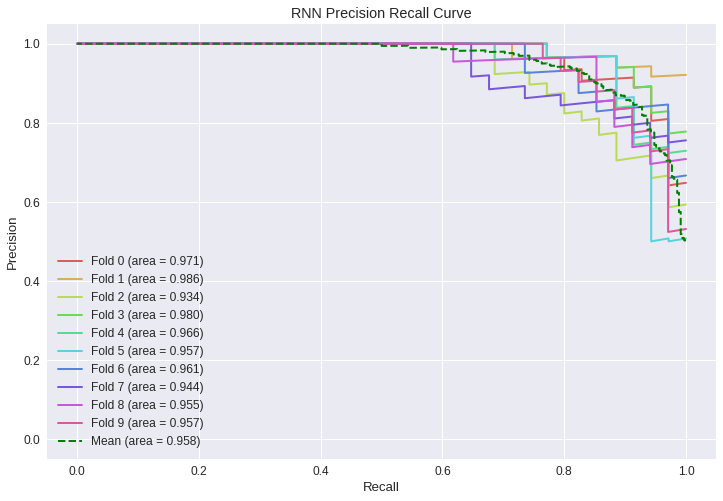

In [19]:
#Iteration number:  0 0.911974790597
"""
Precision-Recall curve
"""
import seaborn as sns
outer_random_seed_list = [43]
random_seed_list = [42]

# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]
labels_one_dim = labels.reshape(labels.shape[0], )
y_real = []
y_proba = []

# colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
#                'deepskyblue', 'lightcoral'])

sns.set(font_scale = 1.2)
colors = sns.hls_palette(10)
fig, ax = plt.subplots()
fig.set_size_inches(12.0, 8.0)

lw = 2
i = 0
precision_rnn = []
recall_rnn = []
threshold_rnn = []
for index, rand_seed_i in enumerate(random_seed_list):
    
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    for (train, test), color in zip(cv_outer.split(data, labels_one_dim), colors):
        X_train, X_test = data[train], data[test]
        y_train, y_test = labels_one_dim[train], labels_one_dim[test]
        val_performance_list = []
        val_model_list = []
        
        new_model = None
        new_model = create_model_no_pretrain_bidirec()
        history = new_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=100, batch_size=32) 
        val_score = new_model.evaluate(X_test, y_test)[1] 
        val_loss = new_model.evaluate(X_test, y_test)[0]
        probas_ = new_model.predict(X_test)
        #print (probas_)
        precision, recall, thresholds = precision_recall_curve(y_test, probas_)
        
        plt.plot(recall, precision, lw=lw, color=color,
             label='Fold %d (area = %0.3f)' % (i, auc(recall, precision)))
        y_real.append(y_test)
        y_proba.append(probas_)
        i += 1
        
        precision_rnn.append(precision)
        recall_rnn.append(recall)
        threshold_rnn.append(thresholds)
        
        
        scores = np.where(probas_ > 0.5, 1, 0)
        precision_s = precision_score(y_test, scores)
        recall_s = recall_score(y_test, scores)
        f1_s = f1_score(y_test, scores)
        print ("so far best val score: ", val_score)
        print ("so far best val loss: ", val_loss)
        print ("so far best precision score: ", precision_s)
        print ("so far best recall score: ", recall_s)
        print ("so far best f1 score: ", f1_s)
        
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, thresholds = precision_recall_curve(y_real, y_proba)
precision_rnn.append(precision)
recall_rnn.append(recall)
threshold_rnn.append(thresholds)
plt.plot(recall, precision, lw=lw, color='g', linestyle='--',
             label='Mean (area = %0.3f)' % (auc(recall, precision)))


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RNN Precision Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [20]:
np.save('rnn_precision_10_fold_seed_43.npy', precision_rnn)
np.save('rnn_recall_10_fold_seed_43.npy', recall_rnn)
np.save('rnn_threshold_10_fold_seed_43.npy', threshold_rnn)

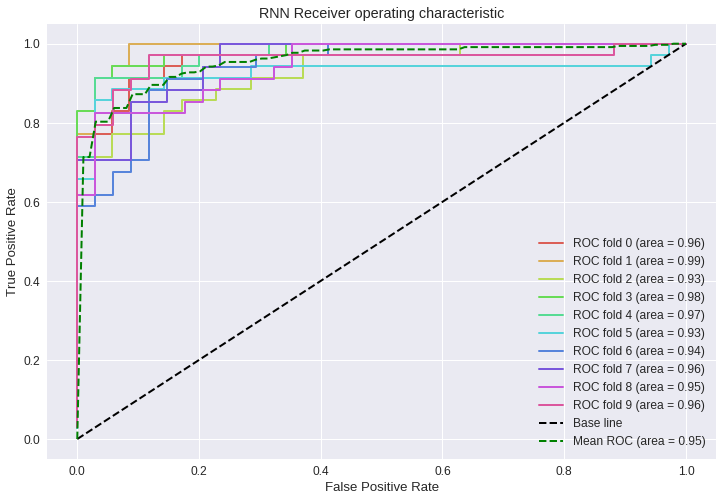

In [188]:
#Iteration number:  0 0.911974790597
"""
ROC curve
"""
outer_random_seed_list = [43]
random_seed_list = [42]

# outer_random_seed_list = [13,23,33,43,53,63,73,83,93]
# random_seed_list = [12,22,32,42,52,62,72,82,92]
labels_one_dim = labels.reshape(labels.shape[0], )
y_real = []
y_proba = []

# ROC curve stuff
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

# colors = cycle(['cyan', 'crimson', 'seagreen', 'yellow', 'blue', 'darkorange', 'darkviolet', 'fuchsia',
#                'deepskyblue', 'lightcoral'])
sns.set(font_scale = 1.2)
colors = sns.hls_palette(10)
fig, ax = plt.subplots()
fig.set_size_inches(12.0, 8.0)

lw = 2
i = 0
fpr_rnn = []
tpr_rnn = []
threshold_roc_rnn = []
for index, rand_seed_i in enumerate(random_seed_list):
    
    cv_outer = StratifiedKFold(n_splits = 10, shuffle = True, random_state = outer_random_seed_list[index])
    count = 0
    for (train, test), color in zip(cv_outer.split(data, labels_one_dim), colors):
        
        print ('Fold: %d' % (count))
        X_train, X_test = data[train], data[test]
        y_train, y_test = labels_one_dim[train], labels_one_dim[test]
        val_performance_list = []
        val_model_list = []
        
        new_model = None
        new_model = create_model_no_pretrain_bidirec()
        history = new_model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=100, batch_size=32) 
        val_score = new_model.evaluate(X_test, y_test)[1] 
        val_loss = new_model.evaluate(X_test, y_test)[0]
        probas_ = new_model.predict(X_test)
        print (probas_)
        fpr, tpr, thresholds = roc_curve(y_test, probas_)
        
        fpr_rnn.append(fpr)
        tpr_rnn.append(tpr)
        threshold_roc_rnn.append(thresholds)
        
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i += 1
        
        
        
        scores = np.where(probas_ > 0.5, 1, 0)
        precision_s = precision_score(y_test, scores)
        recall_s = recall_score(y_test, scores)
        f1_s = f1_score(y_test, scores)
        print ("so far best val score: ", val_score)
        print ("so far best val loss: ", val_loss)
        print ("so far best precision score: ", precision_s)
        print ("so far best recall score: ", recall_s)
        print ("so far best f1 score: ", f1_s)
        count = count + 1
# Draw ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Base line')

mean_tpr /= cv_outer.get_n_splits(data, labels_one_dim)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [190]:
np.save('rnn_fpr_10_fold_seed_43.npy', fpr_rnn)
np.save('rnn_tpr_10_fold_seed_43.npy', tpr_rnn)
np.save('rnn_threshold_roc_10_fold_seed_43.npy', threshold_roc_rnn)

## Wild data

In [76]:
final_model = None
final_model = create_model_no_pretrain_bidirec()
history = final_model.fit(data, labels, epochs=100, batch_size=32)
final_model.save('final_NN_model.h5')

In [77]:
lactobacillus_files = ['NC_021516.faa', 'NC_010609.faa', 'NC_015214.faa', 'NC_015420.faa', 'NC_020827.faa', 
                       'NC_021903.faa', 'NC_011352.faa', 'NC_021515.faa', 'NC_013504.faa', 'NC_008526.faa', 
                       'NC_021181.faa', 'NC_015429.faa', 'NC_020820.faa', 'NC_021495.faa', 'NC_015701.faa', 
                       'NC_021498.faa', 'NC_020825.faa', 'NC_014727.faa', 'NC_017491.faa', 'NC_020824.faa', 
                       'NC_015322.faa', 'NC_020819.faa', 'NC_021503.faa', 'NC_014334.faa', 'NC_021519.faa', 
                       'NC_021226.faa', 'NC_006377.faa', 'NC_017467.faa', 'NC_006814.faa', 'NC_020828.faa', 
                       'NC_021497.faa', 'NC_008498.faa', 'NC_015978.faa', 'NC_021723.faa', 'NC_021228.faa', 
                       'NC_017480.faa', 'NC_021744.faa', 'NC_020822.faa', 'NC_010080.faa', 'NC_008054.faa', 
                       'NC_017469.faa', 'NC_013200.faa', 'NC_021518.faa', 'NC_021520.faa', 'NC_012552.faa', 
                       'NC_015697.faa', 'NC_021225.faa', 'NC_021517.faa', 'NC_015979.faa', 'NC_018641.faa', 
                       'NC_015218.faa', 'NC_007930.faa', 'NC_010610.faa', 'NC_015698.faa', 'NC_006530.faa', 
                       'NC_017476.faa', 'NC_021872.faa', 'NC_021234.faa', 'NC_017475.faa', 'NC_021904.faa', 
                       'NC_015975.faa', 'NC_008497.faa', 'NC_015603.faa', 'NC_018611.faa', 'NC_014724.faa', 
                       'NC_013199.faa', 'NC_015699.faa', 'NC_015213.faa', 'NC_022114.faa', 'NC_021235.faa', 
                       'NC_006376.faa', 'NC_020057.faa', 'NC_007576.faa', 'NC_017474.faa', 'NC_012984.faa', 
                       'NC_021528.faa', 'NC_013198.faa', 'NC_014106.faa', 'NC_017471.faa', 'NC_006529.faa', 
                       'NC_015319.faa', 'NC_017468.faa', 'NC_017470.faa', 'NC_008530.faa', 'NC_015428.faa', 
                       'NC_021514.faa', 'NC_004567.faa', 'NC_021722.faa', 'NC_018528.faa', 'NC_017479.faa', 
                       'NC_016035.faa', 'NC_021496.faa', 'NC_021227.faa', 'NC_017481.faa', 'NC_021504.faa', 
                       'NC_007929.faa', 'NC_014728.faa', 'NC_015602.faa', 'NC_015980.faa', 'NC_017473.faa', 
                       'NC_020821.faa', 'NC_008502.faa', 'NC_020229.faa', 'NC_008529.faa', 'NC_021526.faa', 
                       'NC_013505.faa', 'NC_015700.faa', 'NC_021912.faa', 'NC_017482.faa', 'NC_021527.faa', 
                       'NC_009513.faa', 'NC_016034.faa', 'NC_006375.faa', 'NC_017499.faa', 'NC_022123.faa', 
                       'NC_014558.faa', 'NC_018610.faa', 'NC_021494.faa', 'NC_021525.faa', 'NC_014554.faa', 
                       'NC_017465.faa', 'NC_015421.faa', 'NC_020826.faa', 'NC_021725.faa', 'NC_005362.faa', 
                       'NC_017477.faa', 'NC_015598.faa', 'NC_017472.faa', 'NC_008499.faa', 'NC_022112.faa', 
                       'NC_021233.faa', 'NC_021224.faa', 'NC_021721.faa', 'NC_022909.faa', 'NC_010999.faa', 
                       'NC_020823.faa']

In [78]:
lactobacullus_file_names = []
for a_file in lactobacillus_files:
    tok = a_file.split('.')[0]
    lactobacullus_file_names.append(tok)    
print (len(lactobacullus_file_names))

In [25]:
"""
Making a file with all the lactobacillus protein sequences from all_gene_blocks
"""
os.chdir('/home/nafizh/ML_works')
target_dir = '/home/nafizh/ML_works/all_gene_blocks'
out_handle = open('all_lactobacillus_sequences_from_geneblocks', 'w')
for root, subFolders, files in os.walk(target_dir):
    for index_1, gene_block_file in enumerate(files):
        tok = gene_block_file.split('_')[0] + '_' + gene_block_file.split('_')[1]
        if tok in lactobacullus_file_names:
            print (tok)
            os.chdir('/home/nafizh/ML_works/all_gene_blocks')
            for rec in SeqIO.parse(gene_block_file, "fasta"):
                if len(rec.seq) <= 302:
                    out_handle.write('>%s\n%s\n' % (rec.description, rec.seq))
                
out_handle.close()               

In [83]:
# second, prepare text samples and their labels
os.chdir('/home/nafizh/ML_works')
print('Processing text dataset')

wild_texts = []
for index, record in enumerate(SeqIO.parse('all_lactobacillus_sequences_from_geneblocks', 'fasta')):
    tri_tokens = trigrams(record.seq)
    temp_str = ""
    for item in ((tri_tokens)):
        #print(item),
        temp_str = temp_str + " " +item[0] + item[1] + item[2]
    #print (temp_str)
    wild_texts.append(temp_str)
print (len(wild_texts))
print (wild_texts[0])

Processing text dataset
55496
 MNE NEL ELE LEF EFK FKQ KQT QTK TKL KLL LLK LKR KRI RIQ IQN QNH NHE HEM EMM MML MLS LSP SPS PSC SCV CVS VSG SGY GYY YYN YNR NRT RTT TTD TDN DNN NNP NPL PLD LDF DFT FTK TKL KLS LSD SDN DNE NEK EKI KIT ITL TLV LVN VNW NWI WIV IVT VTV TVF VFK FKP KPI PIK IKT KTV TVN VNK NKW KWH WHS HSS SSY SYG YGL GLK LKH KHL HLF LFE FEH EHA HAP APL PLG LGF GFY FYV YVK VKN KNG NGA GAF AFK FKG KGA GAM AML MLI LIA IAG AGF GFE FEP EPV PVD VDP DPN PNE NEL ELN LNW NWR WRF RFK FKI KIS ISE SEV EVS VSI SID IDN DNS NSE SEI EIA IAK AKA KAW AWD WDF DFT FTS TSK SKG KGD GDN


In [84]:
# finally, vectorize the text samples into a 2D integer tensor
# wild_tokenizer = Tokenizer(num_words=MAX_NB_WORDS) #MAX_NB_WORDS = 10334
# wild_tokenizer.fit_on_texts(wild_texts)
wild_sequences = tokenizer.texts_to_sequences(wild_texts)

wild_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(wild_word_index))

Found 10334 unique tokens.


In [85]:
print (len(wild_sequences))
print (wild_sequences[0])
print (type(wild_word_index))
print (wild_word_index)

55496
[6612, 344, 76, 6925, 2596, 4035, 3431, 6842, 1973, 930, 520, 994, 2912, 5418, 4339, 6112, 8402, 2899, 6392, 5595, 606, 2242, 1937, 2689, 1309, 3110, 165, 3275, 2982, 4186, 4255, 2071, 1412, 1651, 6244, 5046, 5390, 3443, 3970, 3134, 3043, 2117, 1973, 668, 117, 2306, 2465, 1835, 708, 343, 491, 470, 1688, 321, 5496, 6553, 2695, 149, 4069, 2304, 8655, 5832, 4043, 1151, 899, 1794, 3466, 4039, 6291, 6041, 3199, 2683, 818, 3676, 2083, 1578, 2930, 4781, 2779, 6123, 2286, 5302, 3969, 759, 743, 2488, 2167, 1813, 802, 496, 482, 148, 2299, 3243, 1012, 1761, 1548, 1846, 200, 59, 1093, 3630, 3944, 4777, 2776, 5899, 3120, 3814, 344, 152, 8633, 8376, 9208, 2759, 2985, 402, 446, 911, 119, 1417, 2819, 4943, 5043, 3423, 479, 591, 327, 509, 3614, 3121, 7940, 3043, 3219, 1187, 1110, 3078, 3929]
<class 'dict'>
{'gga': 1, 'aaa': 2, 'aag': 3, 'gaa': 4, 'ggg': 5, 'agg': 6, 'igg': 7, 'gng': 8, 'ggk': 9, 'vgg': 10, 'gag': 11, 'ngv': 12, 'ilg': 13, 'lgg': 14, 'aga': 15, 'gai': 16, 'ygn': 17, 'kel': 18, 'gv

In [86]:
print (len(wild_word_index))
print (wild_word_index)

10334
{'gga': 1, 'aaa': 2, 'aag': 3, 'gaa': 4, 'ggg': 5, 'agg': 6, 'igg': 7, 'gng': 8, 'ggk': 9, 'vgg': 10, 'gag': 11, 'ngv': 12, 'ilg': 13, 'lgg': 14, 'aga': 15, 'gai': 16, 'ygn': 17, 'kel': 18, 'gvg': 19, 'atg': 20, 'agl': 21, 'aat': 22, 'vag': 23, 'aig': 24, 'tgg': 25, 'lag': 26, 'saa': 27, 'gig': 28, 'gva': 29, 'glg': 30, 'vga': 31, 'agv': 32, 'els': 33, 'ala': 34, 'laa': 35, 'mkk': 36, 'ggv': 37, 'eel': 38, 'gsg': 39, 'gav': 40, 'avg': 41, 'aia': 42, 'egg': 43, 'aal': 44, 'ata': 45, 'gal': 46, 'sgg': 47, 'alg': 48, 'yyg': 49, 'sga': 50, 'aav': 51, 'kkl': 52, 'iig': 53, 'iga': 54, 'kyy': 55, 'ggs': 56, 'ael': 57, 'ava': 58, 'iag': 59, 'lgl': 60, 'ggn': 61, 'tga': 62, 'vvg': 63, 'gvt': 64, 'lga': 65, 'asg': 66, 'kkk': 67, 'lgi': 68, 'lgv': 69, 'lla': 70, 'all': 71, 'ela': 72, 'ggl': 73, 'agi': 74, 'avv': 75, 'ele': 76, 'tlt': 77, 'gka': 78, 'ldl': 79, 'aai': 80, 'vdw': 81, 'vlg': 82, 'aas': 83, 'taa': 84, 'ggi': 85, 'via': 86, 'isg': 87, 'gla': 88, 'ggf': 89, 'gls': 90, 'lta': 91, '

In [87]:
wild_data = pad_sequences(wild_sequences, maxlen=MAX_SEQUENCE_LENGTH) #MAX_SEQUENCE_LENGTH = 302

#labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', wild_data.shape)

Shape of data tensor: (55496, 302)


In [88]:
wild_scores_probability = final_model.predict(wild_data)
wild_scores = np.where(wild_scores_probability > 0.5, 1, 0)

In [133]:
print (len(wild_scores_probability))
print (len(wild_scores[wild_scores == 1]))
print (len(wild_scores_probability[wild_scores_probability > 0.9]))

55496
2512
1042


In [95]:
out_handle = open('all_lactobacillus_predictions_neural_network', 'w')
for index, record in enumerate(SeqIO.parse('all_lactobacillus_sequences_from_geneblocks', 'fasta')):
    out_handle.write('>%s|%s\n%s\n' % (record.description, str(wild_scores_probability[index][0]), record.seq))

out_handle.close()
print ("Done")

Done


In [105]:
"""
Take only the sequences with >0.5
"""

out_handle = open('all_lactobacillus_predictions_neural_network_0.5', 'w')
for index, record in enumerate(SeqIO.parse('all_lactobacillus_predictions_neural_network', 'fasta')):
    tok = record.description.split('|')[-1]
    #print (tok)
    if float(tok) >= 0.5:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))

out_handle.close()
print ("Done")

Done


## Sorting the lactobacillus predictions by probability

In [137]:
sort_dict = defaultdict(int)
for index, record in enumerate(SeqIO.parse('temp_word_svm_wild_predictions_lacto_10_fold_0.5_size_200', 'fasta')):
    tok = record.description.split("|")[5]
    sort_dict[index] = float(tok)
    
sorted_tuples = sorted(sort_dict.items(), key=lambda x: x[1], reverse=True)
print (sorted_tuples)

[(35, 0.99721), (99, 0.99721), (146, 0.99721), (138, 0.99435), (281, 0.994026), (425, 0.994026), (197, 0.993026), (34, 0.99247), (98, 0.99247), (524, 0.992371), (145, 0.99216), (212, 0.992008), (715, 0.99092), (208, 0.985419), (747, 0.984276), (107, 0.983128), (139, 0.983068), (319, 0.979882), (316, 0.978269), (318, 0.978263), (527, 0.978263), (15, 0.978247), (530, 0.978247), (13, 0.978242), (528, 0.978242), (317, 0.978231), (17, 0.978213), (532, 0.978213), (755, 0.978213), (282, 0.976814), (426, 0.976814), (213, 0.976594), (214, 0.975636), (335, 0.972764), (73, 0.972636), (415, 0.971916), (702, 0.970079), (411, 0.969131), (739, 0.967515), (74, 0.962042), (109, 0.961053), (97, 0.958731), (116, 0.958427), (800, 0.958093), (803, 0.958093), (400, 0.956449), (576, 0.956449), (793, 0.956449), (336, 0.955773), (93, 0.954477), (628, 0.954477), (184, 0.95392), (805, 0.953281), (701, 0.950248), (12, 0.947726), (14, 0.944928), (529, 0.944928), (658, 0.942647), (210, 0.941898), (60, 0.94063), (47

In [138]:
out_handle = open('temp_word_svm_wild_predictions_lacto_10_fold_0.5_size_200_sorted', 'w')
for index, proba_ in sorted_tuples:
    for index1, record in enumerate(SeqIO.parse('temp_word_svm_wild_predictions_lacto_10_fold_0.5_size_200', 'fasta')):
        if index == index1:
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
            break
            
out_handle.close()

In [116]:
nn_prot_id_prob = []
for index1, record in enumerate(SeqIO.parse('all_lactobacillus_predictions_neural_network', 'fasta')):
    tok = record.description.split("|")[0]
    prob = record.description.split("|")[-1]
    #print (tok)
    nn_prot_id_prob.append((tok, float(prob)))
    #print (nn_prot_id_prob)
    #break
print ("Done")
print (len(nn_prot_id_prob))

Done
55496


In [117]:
nn_svm_tuples = []
for index, record in enumerate(SeqIO.parse('temp_word_svm_wild_predictions_lacto_10_fold_all_lactobacillus_size_200', 'fasta')):
    tok = record.description.split("|")[0]
    prob = record.description.split("|")[-1]
    nn_svm_tuples.append((nn_prot_id_prob[index][1], float(prob)))

print (len(nn_svm_tuples))

55496


In [128]:
print (nn_svm_tuples)

[(0.0358158, 0.266418), (0.00750783, 0.251818), (0.0119554, 0.173471), (0.780869, 0.246296), (0.00788218, 0.256202), (0.0255552, 0.256086), (0.0217177, 0.256112), (0.0168176, 0.251006), (0.0743202, 0.213871), (0.0094009, 0.256214), (0.602239, 0.256156), (0.364978, 0.259225), (0.00792749, 0.008093), (0.00837572, 0.256962), (0.100606, 0.256058), (0.00711779, 0.085608), (0.0109632, 0.256075), (0.00978624, 0.242927), (0.0647625, 0.256403), (0.00437095, 0.256687), (0.0111604, 0.269476), (0.992244, 0.285252), (0.0208165, 0.25641), (0.0153353, 0.256484), (0.00578586, 0.255943), (0.0190245, 0.250391), (0.996846, 0.23392), (0.00514106, 0.256066), (0.0204433, 0.241123), (0.0105131, 0.364743), (0.0311931, 0.256058), (0.015007, 0.257681), (0.00664052, 0.256425), (0.0140922, 0.071295), (0.00730682, 0.256087), (0.00252387, 0.256069), (0.0216868, 0.256403), (0.0074746, 0.267745), (0.0117832, 0.256296), (0.00859076, 0.247105), (0.00372863, 0.260878), (0.00545453, 0.256069), (0.0249093, 0.255397), (0.0

In [134]:
out_handle = open('all_lactobacillus_predictions_neural_network_0.9_sorted_cdhit_0.7', 'w')
for index1, record in enumerate(SeqIO.parse('all_lactobacillus_predictions_neural_network_0.5_sorted_cdhit_0.7', 'fasta')):
    confidence_score = record.description.split("|")[-1]
    if float(confidence_score) >= 0.9:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))

out_handle.close()
print ("done")

done


In [136]:
out_handle = open('all_lactobacillus_predictions_neural_network_0.99_sorted_cdhit_0.7', 'w')
for index1, record in enumerate(SeqIO.parse('all_lactobacillus_predictions_neural_network_0.5_sorted_cdhit_0.7', 'fasta')):
    confidence_score = record.description.split("|")[-1]
    if float(confidence_score) >= 0.99:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))

out_handle.close()
print ("done")

done


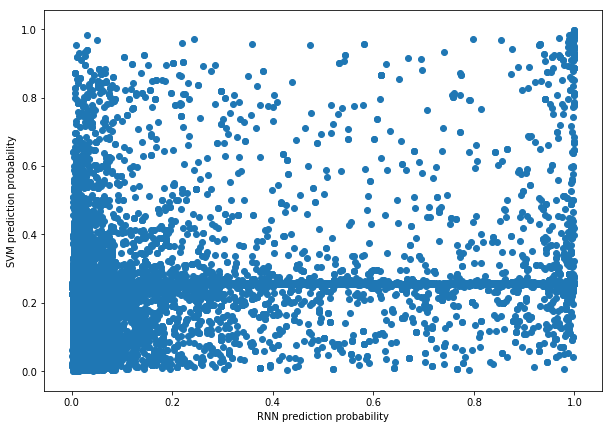

In [141]:
plt.scatter(*zip(*nn_svm_tuples))
plt.xlabel("RNN prediction probability")
plt.ylabel("SVM prediction probability")
plt.show()

In [118]:
x = [tup[0] for tup in nn_svm_tuples]
y = [tup[1] for tup in nn_svm_tuples]
df = pd.DataFrame({'RNN': x, 'SVM': y})

/home/nafizh/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/nafizh/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


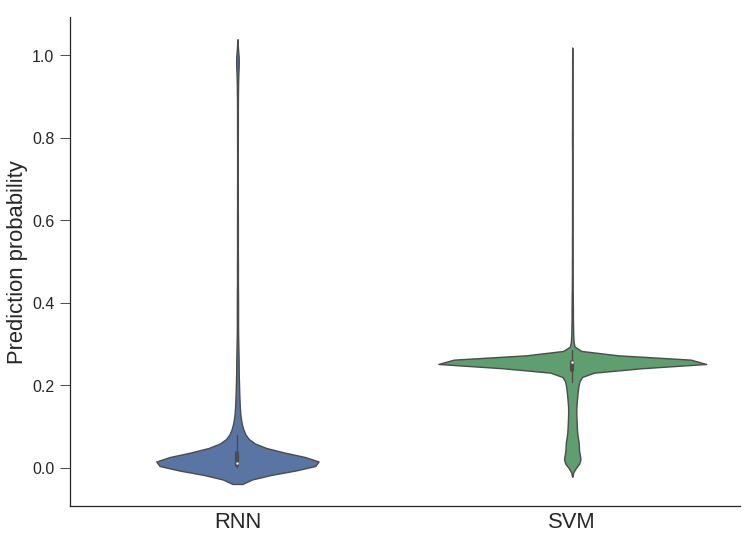

In [274]:
import seaborn as sns
import matplotlib
sns.set_style("white")
sns.despine()
sns.set_context('paper')
#sns.set_style('ticks')

plt.rcParams['axes.labelweight'] = 'normal'
plt.rc('ytick',labelsize=16)
#matplotlib.rc('font',**{'size':16, 'family':'Open Sans'})
#sns.set_context("paper", font_scale=2)
#sns.set(font_scale = 2)
ax = sns.violinplot(data = df)
#ax = sns.stripplot(data=df)
ax.set_ylabel('Prediction probability', fontsize = 22)
#ax.set_ylabel('Prediction probability', fontsize = 16)
ax.set_xticklabels(labels = ['RNN', 'SVM'], fontsize = 22)
ax.tick_params(axis = 'y', size = 10)
# ax.yaxis.get_major_ticks
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.get_yaxis().tick_left() 

ax.figure.set_size_inches(12, 9)
ax.figure.savefig('violinplot.eps', format = 'eps', dpi = 1200, bbox_inches="tight")
ax.figure.savefig('violinplot.png', format = 'png', dpi = 1200, bbox_inches="tight")
ax.figure.savefig('violinplot.pdf', format = 'pdf', dpi = 1200, bbox_inches="tight")

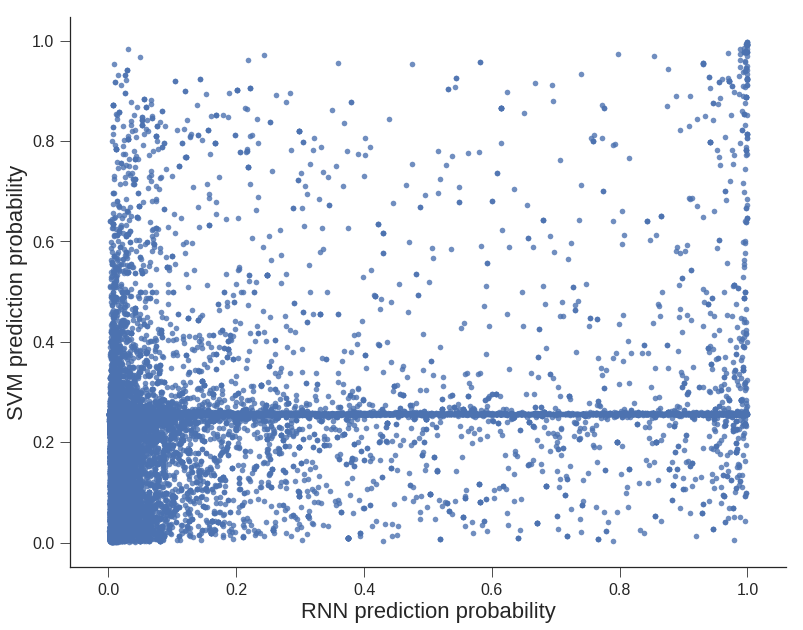

In [213]:
#fig, ax = plt.subplots()
plt.rc('xtick',labelsize=16)
plt.rc('xtick',labelsize=16)
ax = sns.lmplot("RNN", "SVM", data = df, fit_reg = False)
ax.set_xlabels('RNN prediction probability', fontsize = 22)
ax.set_ylabels('SVM prediction probability', fontsize = 22)
plt.tick_params(size = 10)
#ax.  tick_params(size = 10)
ax.fig.set_size_inches(12, 9)

plt.savefig('rnn_svm_scatter.eps', format = 'eps', dpi = 1200, bbox_inches="tight")
plt.savefig('rnn_svm_scatter.png', format = 'png', dpi = 1200, bbox_inches="tight")
plt.savefig('rnn_svm_scatter.pdf', format = 'pdf', dpi = 1200, bbox_inches="tight")

In [150]:
zip(*nn_svm_tuples)

TypeError: 'zip' object is not subscriptable

In [130]:
list_index_both_nine = []
for index, a_tuple in enumerate(nn_svm_tuples):
    if a_tuple[0] >= 0.9 and a_tuple[1] >= 0.9:
        list_index_both_nine.append(index)
print (len(list_index_both_nine))

77


In [132]:
out_handle = open('all_lactobacillus_greater_than_0.9_both_svm_nn.fa', 'w')
for index, record in enumerate(SeqIO.parse('all_lactobacillus_predictions_neural_network', 'fasta')):
    if index in list_index_both_nine:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
out_handle.close()
print ("done")

done


In [262]:
"""
2nd negative bacteriocin set 
Results from the ultimate RNN model 10x cv done 10 times
"""
from scipy import stats
precision_scores_mean_list = [0.919491340714,0.926537799082,0.923473327748,0.913266683036,0.923545890325,
                             0.928266984517,0.936019398697,0.932081965702,0.918277120226,0.920178006687]
recall_scores_mean_list = [0.905042016807,0.896218487395,0.895798319328,0.904621848739,0.88974789916,
                          0.898823529412,0.905042016807,0.89,0.901848739496,0.893361344538]
f1_scores_mean_list = [0.910909970352,0.909289753506,0.909138130333,0.907664087202,0.903787954611,
                      0.911666211819,0.91711599976,0.908991838589,0.909518101304,0.904711991023]

print (np.mean(precision_scores_mean_list), stats.sem(precision_scores_mean_list))
print (np.mean(recall_scores_mean_list), stats.sem(recall_scores_mean_list))
print (np.mean(f1_scores_mean_list), stats.sem(f1_scores_mean_list))

0.924113851673 0.00215426388644
0.898050420168 0.00188600086698
0.90927940385 0.00117167540528


In [263]:
"""
3rd negative bacteriocin set
Results from the ultimate RNN model 10x cv done 10 times
"""
from scipy import stats
precision_scores_mean_list = [0.9456998557,0.940700754708,0.931816420402,0.927057569025,0.940825725998,
                             0.934444222021,0.9550885645,0.940402557301,0.926407395819,0.93333081982]
recall_scores_mean_list = [0.933781512605,0.916554621849,0.915882352941,0.904705882353,0.921680672269,
                          0.930756302521,0.913361344538,0.927394957983,0.92487394958,0.925294117647]
f1_scores_mean_list = [0.939102503246,0.926934988896,0.922784678698,0.915208462875,0.929923350567,
                      0.9316449483,0.932605412257,0.932800027197,0.92391128804,0.92807715932]

print (np.mean(precision_scores_mean_list), stats.sem(precision_scores_mean_list))
print (np.mean(recall_scores_mean_list), stats.sem(recall_scores_mean_list))
print (np.mean(f1_scores_mean_list), stats.sem(f1_scores_mean_list))

0.937577388529 0.00278363994217
0.921428571429 0.00279149607081
0.92829928194 0.00208775705324


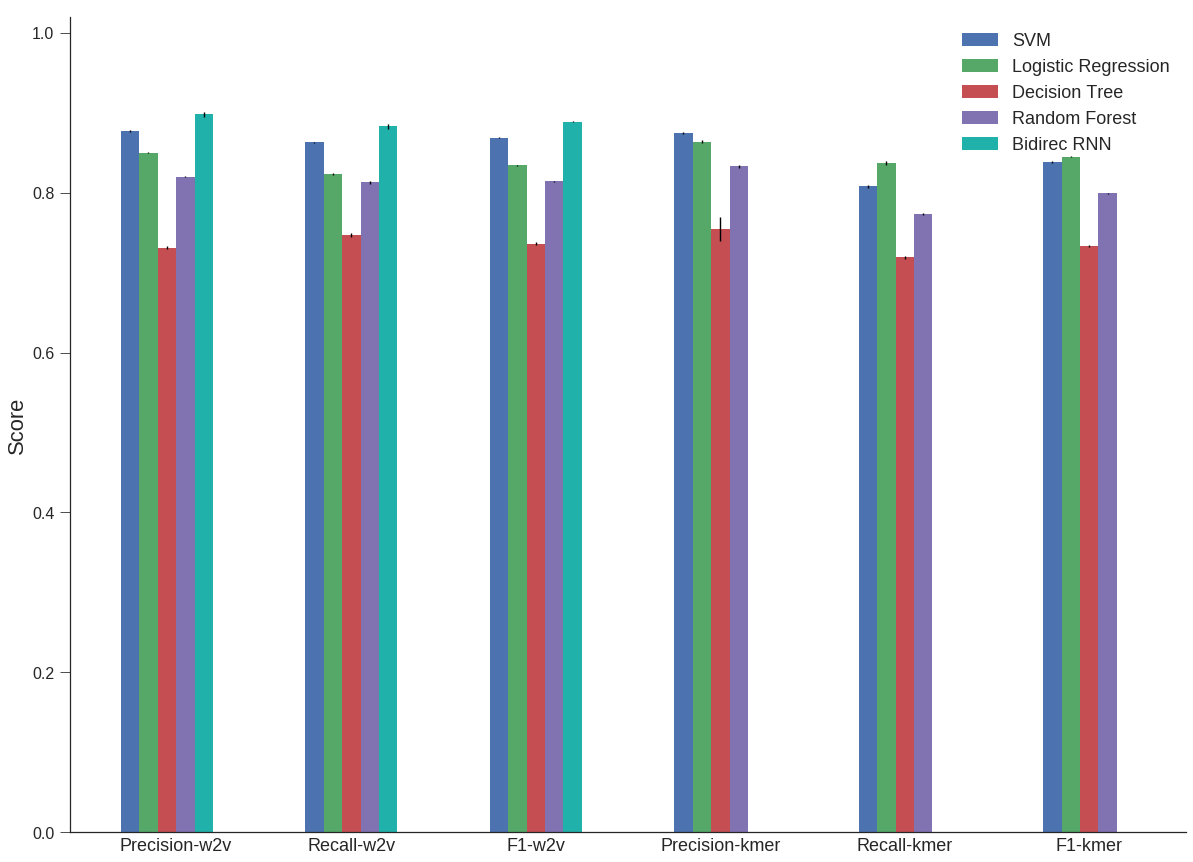

In [288]:
mean_precision_w2v = [0.877, 0.85, 0.731, 0.82, 0.898]
mean_recall_w2v = [0.863, 0.823, 0.747, 0.813, 0.883]
mean_f1_w2v = [0.869, 0.834, 0.736, 0.814, 0.889]
mean_precision_kmer = [0.875, 0.864, 0.755, 0.833]
mean_recall_kmer = [0.808, 0.837, 0.719, 0.773]
mean_f1_kmer = [0.838, 0.846, 0.733, 0.799]

mean_svm = [0.877, 0.863, 0.869,0.875,0.808,0.838]
mean_logreg = [0.85, 0.823, 0.834,0.864, 0.837, 0.845]
mean_dt = [0.731, 0.747, 0.736,0.755, 0.719, 0.733]
mean_rf = [0.82, 0.813, 0.814,0.833, 0.773, 0.799]
mean_rnn = [0.898, 0.883, 0.889,0,0,0]

mean_svm_error = [0.001, 0.001, 0.0009, 0.001, 0.002, 0.001]
mean_logreg_error = [0.001, 0.001, 0.0009, 0.002, 0.002, 0.001]
mean_dt_error = [0.002, 0.003, 0.002, 0.015, 0.002, 0.001]
mean_rf_error = [0.001, 0.002, 0.001, 0.002, 0.001, 0.001]
mean_rnn_error = [0.003, 0.003, 0.001, 0, 0 , 0]

plt.rc('ytick',labelsize=18)
plt.rc('xtick',labelsize=18)
algos = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Bidirec RNN']
pos = list(range(len(mean_svm_w2v))) 
width = 0.1 

fig, ax = plt.subplots()
fig.set_size_inches(20.0, 15.0)
plt.tick_params(size = 10)
#plt.rc('xtick',labelsize=18)
plt.bar(pos, mean_svm, width, yerr = mean_svm_error)
plt.bar([p + width for p in pos], mean_logreg, width, yerr = mean_logreg_error) 
plt.bar([p + 2*width for p in pos], mean_dt, width, yerr = mean_dt_error) 
plt.bar([p + 3*width for p in pos], mean_rf, width, yerr = mean_rf_error) 
plt.bar([p + 4*width for p in pos], mean_rnn, width, color = 'lightseagreen', yerr = mean_rnn_error) 

# plt.scatter(pos, mean_svm_w2v,  s=90)
# plt.scatter([p + width for p in pos], mean_logreg_w2v, s=100) 
# plt.scatter([p + 2*width for p in pos], mean_dt_w2v, s=100) 
# plt.scatter([p + 3*width for p in pos], mean_rf_w2v,  s=100) 
# plt.scatter([p + 4*width for p in pos], mean_rnn_w2v,   s=100) 

# Set the y axis label
ax.set_ylabel('Score',fontsize = 22)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.tick_params(axis = 'x', size = 0)
plt.xticks([0.25,1.2,2.2,3.2,4.2,5.2], ('Precision-w2v', 'Recall-w2v', 'F1-w2v','Precision-kmer', 'Recall-kmer', 
                                        'F1-kmer'))
#plt.xticks()
# plt.bar([p + 5*width/2 for p in pos], mean_svm_kmer, width/2)
# plt.bar([p + 6*width/2 for p in pos], mean_logreg_kmer, width/2) 
# plt.bar([p + 7*width/2 for p in pos], mean_dt_kmer, width/2) 
# plt.bar([p + 8*width/2 for p in pos], mean_rf_kmer, width/2) 
# Set the chart's title
#ax.set_title('Test Subject Scores')

# Set the position of the x ticks
#ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
#ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
#plt.xlim([0, 1.02])
plt.ylim(0.0,1.02)

#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(algos, loc='upper right', fontsize = 18)
ax.figure.savefig('bar.eps', format = 'eps', dpi = 1200, bbox_inches="tight")
ax.figure.savefig('bar.png', format = 'png', dpi = 1200, bbox_inches="tight")
ax.figure.savefig('bar.pdf', format = 'pdf', dpi = 1200, bbox_inches="tight")
#plt.grid()
plt.show()

/home/nafizh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


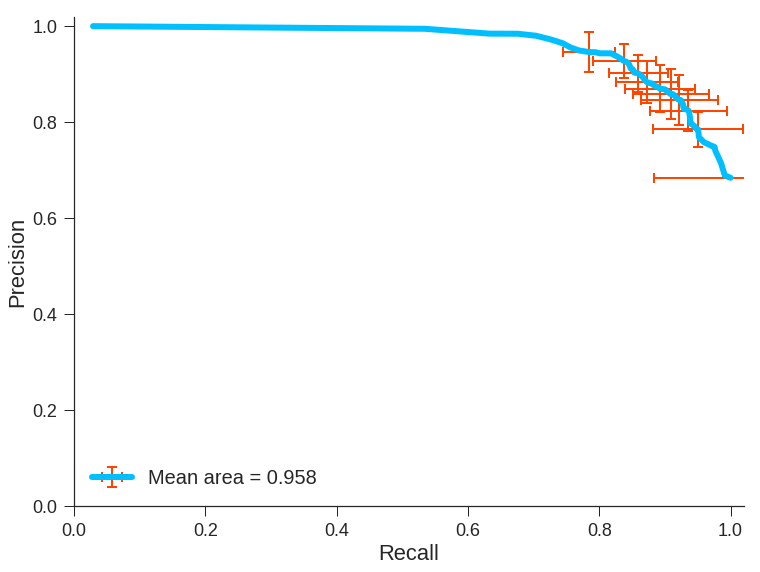

In [211]:
sns.set_style("white")
plt.rc('ytick',labelsize=18)
plt.rc('xtick',labelsize=18)
_, axs = plt.subplots(1, 1, figsize=(12,9))
#fig.set_size_inches(12.0, 8.0)
def label_plot(ax, is_pr=True):
    x, y = (('recall', 'precision')
            if is_pr else
            ('false pos rate', 'true pos rate'))
    ax.set_xlabel('Recall', fontsize = 22)
    ax.set_ylabel('Precision', fontsize = 22)
    ax.set_xlim([0,1.02])
    ax.set_ylim([0,1.02])
    

sampled_thresholds = np.linspace(0.0, 1.0, 100)
sampled_precisions = []
sampled_recalls = []
# assume curves is a list of (precision, recall, threshold)
# tuples where each of those three is a numpy array
count = 0
for precision, recall, threshold in zip(precision_rnn, recall_rnn, threshold_rnn):
    if count == 10:
        break
    sampled_precisions.append(
np.interp(sampled_thresholds, threshold, precision[:-1]))
    sampled_recalls.append(
np.interp(sampled_thresholds, threshold, recall[:-1]))
    count = count + 1

axs.errorbar(
    np.mean(sampled_recalls, axis=0),
    np.mean(sampled_precisions, axis=0),
    np.std(sampled_recalls, axis=0),
    np.std(sampled_precisions, axis=0),
    color='deepskyblue',
    errorevery=10,
    ecolor='orangered',
    lw=2, fmt = '-',  capsize = 5, elinewidth=2,markeredgewidth=2, linewidth = 6.0, 
    label = 'Mean area = %0.3f' % (0.958))
label_plot(axs)
#axs.set_title('N={}'.format(N))
plt.tick_params(size = 10)
axs.spines["top"].set_visible(False)  
axs.spines["right"].set_visible(False)
axs.figure.set_size_inches(12, 9)
axs.legend(loc = 'lower left', fontsize=20)
axs.figure.savefig('pr-rnn.pdf', format = 'pdf', dpi = 1200, bbox_inches="tight")
axs.figure.savefig('pr-rnn.svg', format = 'svg', dpi = 1200, bbox_inches="tight")